In [16]:
import mysql.connector
import sqlalchemy as db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
con = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd=pswd
)

In [203]:
c = con.cursor(buffered=True)
query = 'USE world'
c.execute(query)

In [204]:
c.execute('show tables')
c.fetchall()

[('city',), ('country',), ('countrylanguage',)]

## 1

In [212]:
query = 'SELECT * FROM country'
c.execute(query)
res = c.fetchall()
cols = c.column_names

# bikin DF
country = pd.DataFrame(res, columns = cols)
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [33]:
query = 'SELECT * FROM city'
c.execute(query)
res = c.fetchall()
cols = c.column_names

# bikin DF
city = pd.DataFrame(res, columns = cols)
city.set_index('ID', inplace=True)
city

,Name,CountryCode,District,Population
ID,,,,
1,Kabul,AFG,Kabol,1780000
2,Qandahar,AFG,Qandahar,237500
3,Herat,AFG,Herat,186800
4,Mazar-e-Sharif,AFG,Balkh,127800
5,Amsterdam,NLD,Noord-Holland,731200
...,...,...,...,...
4075,Khan Yunis,PSE,Khan Yunis,123175
4076,Hebron,PSE,Hebron,119401
4077,Jabaliya,PSE,North Gaza,113901


In [36]:
query = 'SELECT * FROM countrylanguage'
c.execute(query)
res = c.fetchall()
cols = c.column_names

# bikin DF
cl = pd.DataFrame(res, columns = cols)
# cit.set_index('ID', inplace=True)
cl

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9
...,...,...,...,...
979,ZMB,Tongan,F,11.0
980,ZWE,English,T,2.2
981,ZWE,Ndebele,F,16.2
982,ZWE,Nyanja,F,2.2


In [42]:
ca = country[country.Population != 0]
ca = ca['Name Continent Region IndepYear Population'.split()]
ca

,Name,Continent,Region,IndepYear,Population
0,Aruba,North America,Caribbean,NaN,103000
1,Afghanistan,Asia,Southern and Central Asia,1919.0,22720000
2,Angola,Africa,Central Africa,1975.0,12878000
3,Anguilla,North America,Caribbean,NaN,8000
4,Albania,Europe,Southern Europe,1912.0,3401200
...,...,...,...,...,...
234,Yemen,Asia,Middle East,1918.0,18112000
235,Yugoslavia,Europe,Southern Europe,1918.0,10640000
236,South Africa,Africa,Southern Africa,1910.0,40377000
237,Zambia,Africa,Eastern Africa,1964.0,9169000


> ## 1.1

In [103]:
ca.sort_values(by=['Population'], ascending = True).head(10)

,Name,Continent,Region,IndepYear,Population
166,Pitcairn,Oceania,Polynesia,NaN,50
38,Cocos (Keeling) Islands,Oceania,Australia and New Zealand,NaN,600
225,Holy See (Vatican City State),Europe,Southern Europe,1929.0,1000
209,Tokelau,Oceania,Polynesia,NaN,2000
71,Falkland Islands,South America,South America,NaN,2000
154,Norfolk Island,Oceania,Australia and New Zealand,NaN,2000
157,Niue,Oceania,Polynesia,NaN,2000
52,Christmas Island,Oceania,Australia and New Zealand,NaN,2500
189,Svalbard and Jan Mayen,Europe,Nordic Countries,NaN,3200
188,Saint Helena,Africa,Western Africa,NaN,6000


> ## 1.2

In [71]:
b = city.groupby('CountryCode')['Population'].mean()
c = b.to_frame()
c.rename(columns={'Population':'mean'}, inplace=True)
c.sort_values('mean', ascending=False).head(10)

,mean
CountryCode,
SGP,4017733.0
HKG,1650316.5
URY,1236000.0
GIN,1090610.0
UGA,890800.0
SLE,850000.0
LBR,850000.0
MLI,809552.0
AUS,808119.0


> ## 1.3

In [102]:
lang = cl.groupby('Language')['Language'].count().to_frame()
lang.rename(columns={'Language':'count'}, inplace=True)
lang.sort_values('count', ascending=False).head(10)

,count
Language,
English,60
Arabic,33
Spanish,28
French,25
Chinese,19
German,19
Russian,17
Italian,15
Creole English,14


## 2

In [111]:
cont = country.groupby('Continent')['Population'].count().to_frame()
cont

,Population
Continent,
Africa,58
Antarctica,5
Asia,51
Europe,46
North America,37
Oceania,28
South America,14


In [115]:
popu = list(cont.index)
popu

['Africa',
 'Antarctica',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'South America']

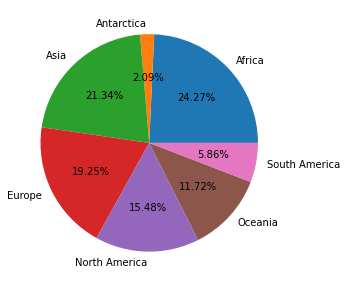

In [114]:
plt.figure(figsize=(10,5))
plt.pie(cont['Population'], labels=popu,
       autopct='%.2f%%')
plt.show()

> ## 2.1
    Benua dengan populasi terbanyak adalah benua Afrika dengan total 24.27%
> ## 2.2 
    Pada benua Amerika terdapat 21.34% populasi manusia (15.48% Amerika utara + 5.86% Amerika Selatan)

## 3

In [120]:
af = country[country.Continent == 'Africa']
af

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
17,BDI,Burundi,Africa,Eastern Africa,27834.0,1962.0,6695000,46.2,903.0,982.0,Burundi/Uburundi,Republic,Pierre Buyoya,552.0,BI
19,BEN,Benin,Africa,Western Africa,112622.0,1960.0,6097000,50.2,2357.0,2141.0,BÃ©nin,Republic,Mathieu KÃ©rÃ©kou,187.0,BJ
20,BFA,Burkina Faso,Africa,Western Africa,274000.0,1960.0,11937000,46.7,2425.0,2201.0,Burkina Faso,Republic,Blaise CompaorÃ©,549.0,BF
35,BWA,Botswana,Africa,Southern Africa,581730.0,1966.0,1622000,39.3,4834.0,4935.0,Botswana,Republic,Festus G. Mogae,204.0,BW
36,CAF,Central African Republic,Africa,Central Africa,622984.0,1960.0,3615000,44.0,1054.0,993.0,Centrafrique/BÃª-AfrÃ®ka,Republic,Ange-FÃ©lix PatassÃ©,1889.0,CF
42,CIV,CÃ´te dÂ’Ivoire,Africa,Western Africa,322463.0,1960.0,14786000,45.2,11345.0,10285.0,CÃ´te dÂ’Ivoire,Republic,Laurent Gbagbo,2814.0,CI
43,CMR,Cameroon,Africa,Central Africa,475442.0,1960.0,15085000,54.8,9174.0,8596.0,Cameroun/Cameroon,Republic,Paul Biya,1804.0,CM
44,COD,"Congo, The Democratic Republic of the",Africa,Central Africa,2344858.0,1960.0,51654000,48.8,6964.0,2474.0,RÃ©publique DÃ©mocratique du Congo,Republic,Joseph Kabila,2298.0,CD
45,COG,Congo,Africa,Central Africa,342000.0,1960.0,2943000,47.4,2108.0,2287.0,Congo,Republic,Denis Sassou-Nguesso,2296.0,CG


In [137]:
neg = af.groupby('Name')['Population'].sum().to_frame()

> ## 3.1

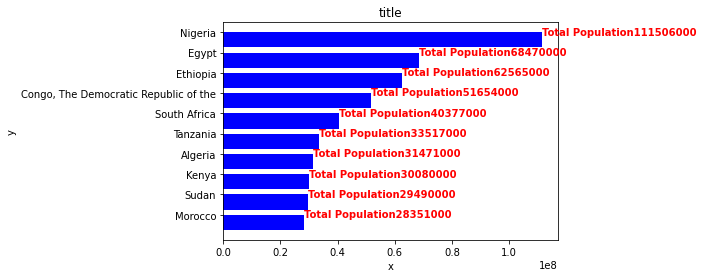

In [402]:
neg = neg.sort_values('Population', ascending=True).head(10)

# # neg.plot(kind = 'barh', figsize=(10,10))
# plt.barh(neg.index, neg.Population)

# plt.show()
y = neg.Population
x = neg.index
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, f'Total Population{v}', color='red', fontweight='bold')
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
plt.show()

In [389]:
neg

,Population
Name,
Morocco,28351000
Sudan,29490000
Kenya,30080000
Algeria,31471000
Tanzania,33517000
South Africa,40377000
"Congo, The Democratic Republic of the",51654000
Ethiopia,62565000
Egypt,68470000


> ## 3.2
    Negara dengan populasi terbanyak ada di Nigeria
> ## 3.3
    Negara yang berada di urutan 10 adalah Morocco
> ## 3.4 
    Negara yang berada di urutan ke tiga adalah Ethiopia dengan populasi sebanyak 62565000 orang

## 4

In [161]:
asia = country[country.Continent == 'Asia']
asia.describe()

,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,Capital
count,5.100000e+01,47.000000,5.100000e+01,51.000000,5.100000e+01,4.500000e+01,51.000000
mean,6.251177e+05,1808.531915,7.264756e+07,67.441176,1.501057e+05,1.833771e+05,2038.803922
std,1.466192e+06,631.614937,2.248504e+08,8.396527,5.431181e+05,6.327974e+05,1133.096342
min,1.800000e+01,-1523.000000,2.860000e+05,45.900000,0.000000e+00,3.830000e+02,1.000000
25%,2.542800e+04,1936.500000,3.191500e+06,62.700000,5.226500e+03,5.924000e+03,1237.000000
50%,1.471810e+05,1948.000000,1.116800e+07,68.500000,1.570600e+04,2.283400e+04,2331.000000
75%,5.006075e+05,1971.000000,3.496450e+07,72.700000,8.574250e+04,1.461710e+05,2902.000000
max,9.572900e+06,1991.000000,1.277558e+09,81.600000,3.787042e+06,4.192638e+06,4074.000000


> ## 4.1

In [363]:
iqr = np.quantile(asia['LifeExpectancy'], 0.75) - np.quantile(asia['LifeExpectancy'], 0.25)

In [364]:
print('IQR dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia adalah', iqr)

IQR dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia adalah 10.0


> ## 4.2

In [365]:
print('mean:', np.mean(asia['LifeExpectancy']))
print('Standard Deviation:', np.std(asia['LifeExpectancy'], ddof=1))
print('Q1:', np.quantile(asia['LifeExpectancy'], 0.25, interpolation='linear'))
print('Median:', np.quantile(asia['LifeExpectancy'], 0.5))
print('Q3:', np.quantile(asia['LifeExpectancy'], 0.75, interpolation='linear'))

mean: 67.44117647058825
Standard Deviation: 8.39652729336571
Q1: 62.7
Median: 68.5
Q3: 72.7


In [366]:
np.quantile(asia['LifeExpectancy'], 0.25, interpolation='linear') - (1.5*iqr) # lower

47.7

In [367]:
np.quantile(asia['LifeExpectancy'], 0.75, interpolation='linear') + (1.5*iqr) # upper

87.7

 - Upper Boundaries = 87.7
 - Lower Boundaries = 47.7

> ## 4.3

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


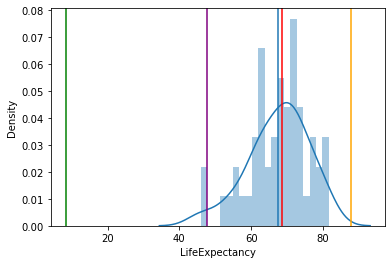

In [188]:
iqr = asia['LifeExpectancy'].quantile(0.75) - asia['LifeExpectancy'].quantile(0.25)
upper_whis = asia['LifeExpectancy'].quantile(0.75) + (1.5*iqr)
lower_whis = asia['LifeExpectancy'].quantile(0.25) - (1.5*iqr)

sns.distplot(asia['LifeExpectancy'], bins = 20)
plt.axvline(asia['LifeExpectancy'].mean())
plt.axvline(asia['LifeExpectancy'].median(), color = 'r')
plt.axvline(asia['LifeExpectancy'].std(), color = 'green')
plt.axvline(upper_whis, color='orange')
plt.axvline(lower_whis, color='purple')
plt.show()

> ## 4.4

In [195]:
asia[asia.LifeExpectancy > upper_whis]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2


In [194]:
asia[(asia.LifeExpectancy < lower_whis)]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
211,TMP,East Timor,Asia,Southeast Asia,14874.0,NaN,885000,46.0,0.0,NaN,Timor Timur,Administrated by the UN,JosÃ© Alexandre GusmÃ£o,1522.0,TP


ada 2 outliers, negara yang berada di bawah lower whisker

> ## 4.5
ada

## 5
> ## 5.1

In [197]:
mil = 1000000

In [214]:
country1 = country.copy()
country1.GNP = country1.GNP * mil
country1

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


> ## 5.2

In [251]:
def percapita(gnp, capita):
    gnpp = gnp/capita
    return gnpp

In [256]:
country1['GNPperCapita'] = percapita(country1.GNP, country1.Population)
country1

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO,516.229228
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL,942.314477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE,333.535777
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU,1597.744361
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA,2890.977537
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM,368.306249


# 6
> ## 6.1

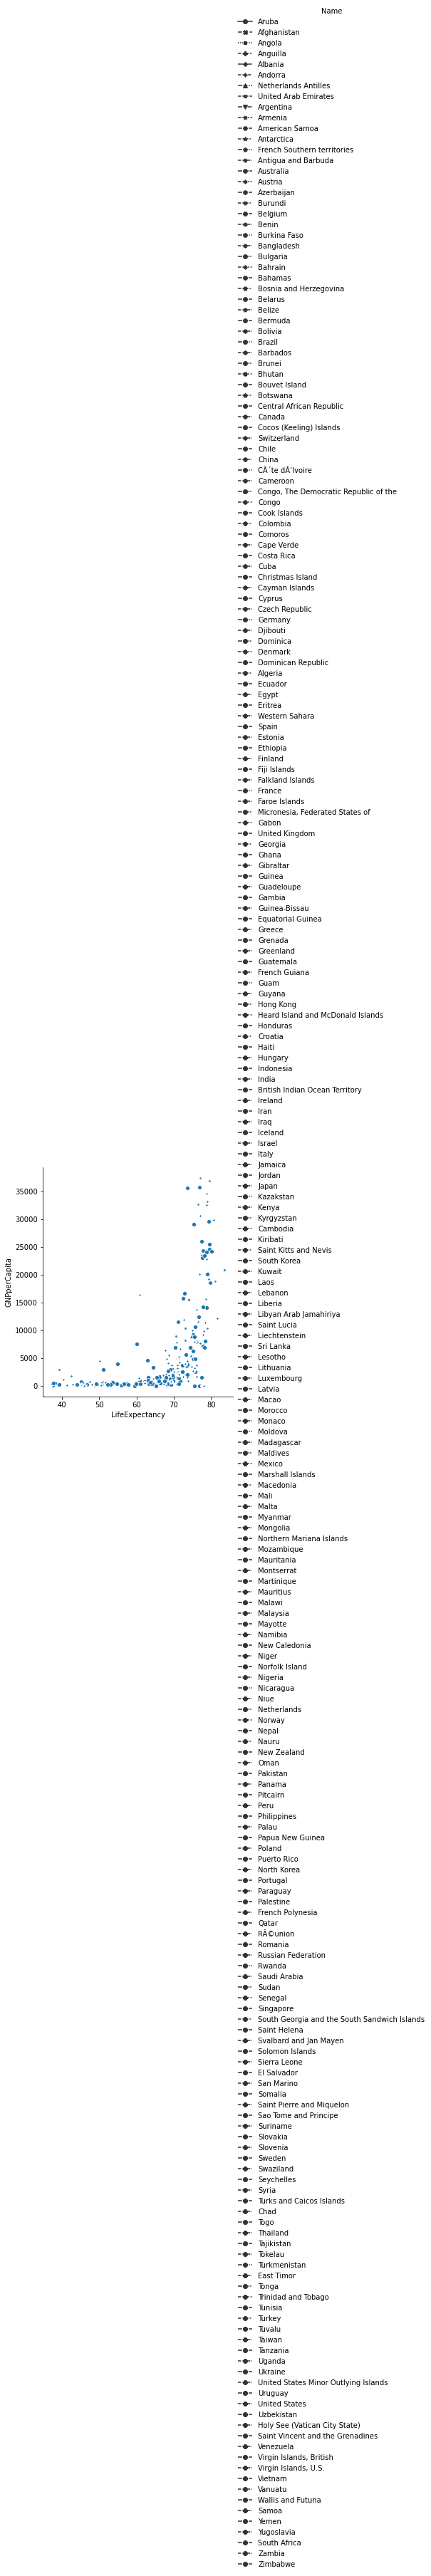

In [322]:
sns.relplot(x='LifeExpectancy', y='GNPperCapita',
            kind='line', data=country1, style='Name', dashes=True,
           markers=True)

plt.show()

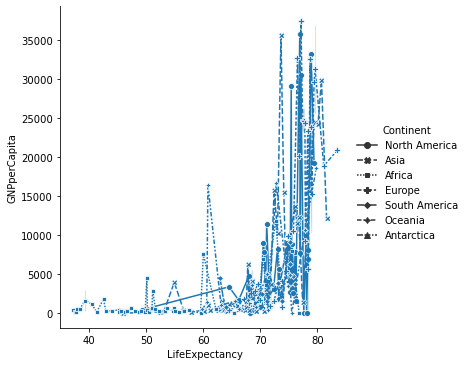

In [319]:
sns.relplot(x='LifeExpectancy', y='GNPperCapita',
            kind='line', data=country1, style='Continent', dashes=True,
           markers=True)

plt.show()

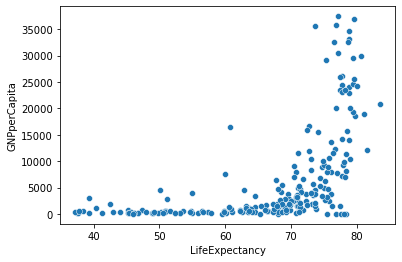

In [314]:
sns.scatterplot(data=country1, x='LifeExpectancy', y='GNPperCapita')
plt.show()

> ## 6.2
    Dari plot di atas dapat di lihat data bergerak ke arah kanan atas menandakan bahwa ada korelasi yang positif terhadap 2 variabel tersebut

> ## 6.3

In [272]:
gnp = country1.sort_values('GNP', ascending=False).head(10)
gnp

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
223,USA,United States,North America,North America,9363520.0,1776.0,278357000,77.1,8.510700e+12,8110900.0,United States,Federal Republic,George W. Bush,3813.0,US,30574.765499
109,JPN,Japan,Asia,Eastern Asia,377829.0,-660.0,126714000,80.7,3.787042e+12,4192638.0,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP,29886.531875
56,DEU,Germany,Europe,Western Europe,357022.0,1955.0,82164700,77.4,2.133367e+12,2102826.0,Deutschland,Federal Republic,Johannes Rau,3068.0,DE,25964.520043
72,FRA,France,Europe,Western Europe,551500.0,843.0,59225700,78.8,1.424285e+12,1392448.0,France,Republic,Jacques Chirac,2974.0,FR,24048.428301
76,GBR,United Kingdom,Europe,British Islands,242900.0,1066.0,59623400,77.7,1.378330e+12,1296830.0,United Kingdom,Constitutional Monarchy,Elisabeth II,456.0,GB,23117.266040
106,ITA,Italy,Europe,Southern Europe,301316.0,1861.0,57680000,79.0,1.161755e+12,1145372.0,Italia,Republic,Carlo Azeglio Ciampi,1464.0,IT,20141.383495
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,9.822680e+11,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN,768.863723
30,BRA,Brazil,South America,South America,8547403.0,1822.0,170115000,62.9,7.767390e+11,804108.0,Brasil,Federal Republic,Fernando Henrique Cardoso,211.0,BR,4565.964201
37,CAN,Canada,North America,North America,9970610.0,1867.0,31147000,79.4,5.988620e+11,625626.0,Canada,"Constitutional Monarchy, Federation",Elisabeth II,1822.0,CA,19226.956047
66,ESP,Spain,Europe,Southern Europe,505992.0,1492.0,39441700,78.8,5.532330e+11,532031.0,EspaÃ±a,Constitutional Monarchy,Juan Carlos I,653.0,ES,14026.601287


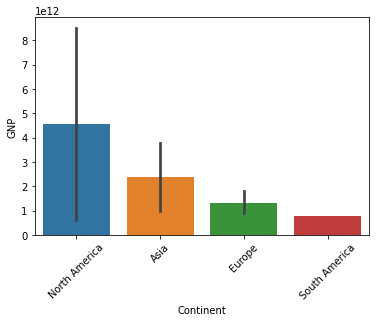

In [278]:
sns.barplot(data = gnp, x='Continent', y='GNP')
plt.xticks(rotation=45)
plt.show()

berdasarkan plot di atas, Amerika Utara merupakan benua dengan negara GNP terbesar 

## 7

In [309]:
euro = country[country.Continent == 'Europe']
euro.shape

(46, 15)

In [310]:
euro.dropna(subset=['GNPOld'],inplace=True)

<ipython-input-310-377add6f5d14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro.dropna(subset=['GNPOld'],inplace=True)


In [311]:
euro.isna().sum()

Code              0
Name              0
Continent         0
Region            0
SurfaceArea       0
IndepYear         0
Population        0
LifeExpectancy    0
GNP               0
GNPOld            0
LocalName         0
GovernmentForm    0
HeadOfState       0
Capital           0
Code2             0
dtype: int64

In [312]:
euro.shape

(36, 15)

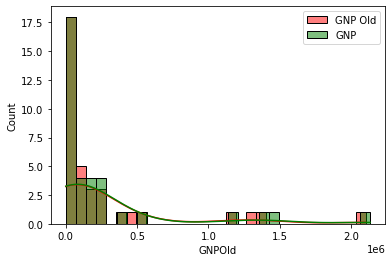

In [324]:
sns.histplot(euro['GNPOld'], bins=30, color='red', label='GNP Old', kde=True)
sns.histplot(euro['GNP'], bins=30, color='green', label='GNP', kde=True)
plt.legend()
plt.show()

In [325]:
euro.describe()

,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,Capital
count,3.600000e+01,36.000000,3.600000e+01,36.000000,3.600000e+01,3.600000e+01,36.000000
mean,6.284391e+05,1761.583333,1.958376e+07,74.827778,2.628369e+05,2.606111e+05,2349.111111
std,2.824573e+06,362.207310,3.035937e+07,4.293957,4.847041e+05,4.739883e+05,1099.593322
min,1.600000e+02,800.000000,3.230000e+04,64.500000,1.119000e+03,1.084000e+03,5.000000
25%,4.146550e+04,1824.000000,3.624175e+06,71.550000,1.180650e+04,1.002300e+04,1508.250000
50%,8.136250e+04,1917.500000,7.626100e+06,76.650000,6.546900e+04,6.258450e+04,2587.000000
75%,3.067995e+05,1991.000000,1.751188e+07,78.325000,2.322950e+05,2.318048e+05,3209.750000
max,1.707540e+07,1993.000000,1.469340e+08,79.600000,2.133367e+06,2.102826e+06,3791.000000


H0 : mu_new = mu_old
H1 : mu_new > mu_old

In [327]:
from scipy import stats

In [340]:
alpha = 0.05
t_crit = 2.021

tstat, pvalue = list(stats.stats.ttest_ind(
    euro['GNPOld'],
    euro['GNP'],
    equal_var = True
)) # urutan berpengaruh
print('alpha:', alpha)
print('pvalue:', pvalue/2)
print('tcrit:', t_crit)
print('tstat', tstat)

alpha: 0.05
pvalue: 0.49217000660925186
tcrit: 2.021
tstat -0.019698393799512437


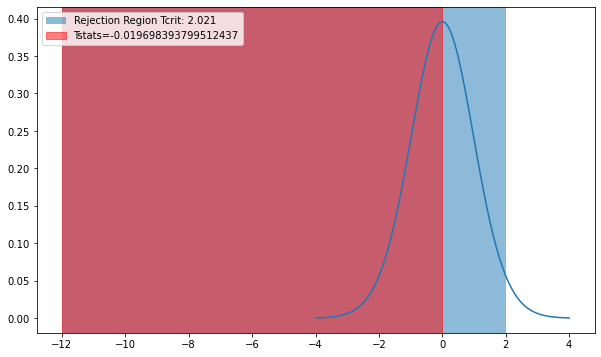

In [346]:
n = len(euro)
x_axis = [i/10 for i in range(-40,41)] # np.arange(-4,4,0.1)
y_axis = [stats.t.pdf(i,n-1) for i in x_axis]

plt.figure(figsize=(10,6))
plt.plot(x_axis, y_axis)
plt.axvspan(t_crit,-12,alpha=0.5,label=f'Rejection Region Tcrit: {t_crit}')
plt.axvspan(tstat,-12,alpha=0.5,color='red', label=f'Tstats={tstat}')
plt.legend(loc='upper left')
plt.show()

dari test di atas dapat dilihat p-value melebihi alpha, artinya kita gagal menolak H0.
Yang berarti tidak ada peningkatan yang signifikan terhadap GNP